In [7]:
!pip install kaggle

In [2]:
# !python -m pip install kaggle==1.6.12


In [3]:
# !pip install --target=/workspace ucimlrepo


## 1.1. Problem Statement

This project explores the relationship between CO₂ emissions and renewable energy production across different countries.
I aim to analyze whether countries with higher renewable energy generation tend to have lower carbon emissions.
Two datasets are used: one on global CO₂ emissions and another on renewable energy share per country.
By cleaning and analyzing these datasets, we hope to uncover meaningful trends that illustrate the global energy transition.

## Dataset 1: CO₂ Emissions Data

The dataset provides annual CO₂ emissions per country (measured in tons).
It is collected from Our World in Data and downloaded manually via direct URL.

Type: CSV file

Method: Manual Download

Source: Our World in Data – CO₂ Emissions

In [29]:

import pandas as pd
co2_url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
co2_df = pd.read_csv(co2_url)

co2_df.head()


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset 2: Renewable Energy Consumption Data

This dataset shows the share of renewable energy in total energy consumption for each country and year.
The data is retrieved programmatically via the World Bank API.

Type: CSV file

Method: Programmatic Download (API)

Source: World Bank Data API

In [30]:
import requests
import io

renewable_url = "http://api.worldbank.org/v2/en/indicator/EG.FEC.RNEW.ZS?downloadformat=csv"
response = requests.get(renewable_url)

with open("renewable_energy.zip", "wb") as f:
    f.write(response.content)

import zipfile, os

with zipfile.ZipFile("renewable_energy.zip", "r") as zip_ref:
    zip_ref.extractall("renewable_data")

for file in os.listdir("renewable_data"):
    if file.endswith(".csv") and "API" in file:
        renewable_file = os.path.join("renewable_data", file)
        break

renew_df = pd.read_csv(renewable_file, skiprows=4)
renew_df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.000000,6.800000,8.600000,8.300000,9.10000,8.8,8.8,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,61.822884,61.426950,61.587530,62.690710,65.78238,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.200000,19.500000,18.300000,18.900000,18.20000,20.0,20.0,NaN,NaN,NaN
3,Africa Western and Central,AFW,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,75.796840,76.101681,75.476578,75.078788,75.84698,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,48.100000,52.500000,52.500000,51.000000,60.10000,52.9,NaN,NaN,NaN,NaN


## 2: Assess the Data

### Data Quality Issues

Quality Issue 1: Missing Data

In [32]:
co2_df.info()
co2_df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

np.int64(0)

Issue:
Several columns (including co2 and energy_per_capita) contain missing values for many countries and years.
These gaps make it difficult to compare CO₂ trends consistently.

Justification:
The .info() and .isnull().sum() methods are used to identify missing values efficiently, as they show which variables are incomplete.

### Quality Issue 2: Duplicate Data

In [45]:
co2_df.duplicated().sum()


np.int64(0)

### Renewable Dataset 

In [61]:

renew_df.duplicated().sum()


np.int64(0)

Issue:
Duplicate rows were found in the dataset, which may lead to overcounting when aggregating emissions by country or year.

Justification:
Using .duplicated() detects repeated entries that distort analysis accuracy.

## Tidiness Issues

### Tidiness Issue 1: Untidy Data Structure

In [47]:
co2_df.head()


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Issue:
The dataset contains multiple variables (such as population, GDP, and several emission types) in one wide table.
This makes it difficult to isolate CO₂ emissions and merge them properly with the renewable dataset.

Justification:
Visual inspection of the dataframe with .head() confirms that the structure needs reshaping.



### Tidiness Issue 2: Inconsistent Data Types

In [48]:
co2_df['year'].dtype


dtype('int64')


Issue:
The column year was initially stored as an object/string instead of an integer, which prevents numerical and time-based operations.

Justification:
The .dtype check shows inconsistent data types — converting year to numeric ensures consistent time-based analysis.



##  3: Clean Data

#### Fixing Missing Data

In [58]:
co2_clean = co2_df.copy()
co2_clean['co2'] = co2_clean['co2'].fillna(co2_clean['co2'].mean())


Justification:
Filling missing CO₂ values with the mean preserves the dataset size while reducing bias caused by missing entries

Validation:

In [50]:
co2_clean['co2'].isnull().sum()


np.int64(0)

 After cleaning missing values, the number of null entries in the co2 column dropped to 0.
This confirms that all missing values were successfully handled.

#### Fixing Duplicate Data

In [51]:
co2_clean.drop_duplicates(inplace=True)


Justification:
Removing duplicate records ensures each (country, year) pair appears only once.

Validation:

In [52]:
co2_clean.duplicated().sum()


np.int64(0)

 All duplicate rows were successfully removed, ensuring each (country, year) record is unique.

#### Fixing Untidy Structure

In [54]:
co2_tidy = co2_clean[['country', 'year', 'co2', 'energy_per_capita']]


Justification:
Keeping only relevant variables (CO₂ and energy use) simplifies the dataset and makes merging easier.


Validation:

In [55]:
co2_tidy.head()


,country,year,co2,energy_per_capita
0,Afghanistan,1750,415.698178,NaN
1,Afghanistan,1751,415.698178,NaN
2,Afghanistan,1752,415.698178,NaN
3,Afghanistan,1753,415.698178,NaN
4,Afghanistan,1754,415.698178,NaN


 After tidying, the dataset now includes only the key variables needed for analysis.

#### Fixing Inconsistent Data Types

In [60]:
co2_tidy['year'] = pd.to_numeric(co2_tidy['year'], errors='coerce')


Justification:
Converting year to numeric ensures consistent indexing and enables time-based grouping.

Validation:

In [57]:
co2_tidy.dtypes


country               object
year                   int64
co2                  float64
energy_per_capita    float64
dtype: object

 The year column is now numeric, enabling consistent time-based operations.

### Clean Renewable Energy Data

In [36]:
renew_clean = renew_df.melt(
    id_vars=['Country Name'],
    var_name='year',
    value_name='renewable_share'
)

renew_clean.rename(columns={'Country Name': 'country'}, inplace=True)
renew_clean.dropna(subset=['renewable_share'], inplace=True)
renew_clean['year'] = pd.to_numeric(renew_clean['year'], errors='coerce')
renew_clean = renew_clean.dropna(subset=['year'])
renew_clean['year'] = renew_clean['year'].astype(int)
renew_clean = renew_clean[renew_clean['year'] >= 2000]


Issue:
This  code's primary role is to reshape the renew_df DataFrame for time-series analysis. It achieves this by using the melt() function, which transforms the data from a Wide format (where years occupy separate columns) into a Long format (where years are stacked into a single column). This is essential for most analytical and machine learning models. Following the structural change, the code immediately performs initial data housekeeping by renaming the 'Country Name' column to the simpler 'country' and using dropna() to remove any rows lacking a valid value in the essential 'renewable_share' column.

Justiffication:
The second set of operations focuses on data type integrity and scope filtering. The code ensures the newly created year column is strictly numeric by applying pd.to_numeric(..., errors='coerce') and immediately dropping any resulting non-numeric rows (NaN). The year column is then finalized as an integer to accurately represent whole years. Finally, the code filters the entire dataset to include only records from the year 2000 onwards, ensuring the final renew_clean DataFrame is ready for analysis, free of structural issues, missing critical values, and irrelevant historical data.

##  4: Merge Datasets

In [37]:
combined_df = pd.merge(co2_clean, renew_clean, on=['country', 'year'], how='inner')
combined_df.drop_duplicates(inplace=True)
combined_df.head()


,country,year,co2,renewable_share
0,Afghanistan,2000,1.047,45.0
1,Afghanistan,2001,1.069,45.6
2,Afghanistan,2002,1.341,37.8
3,Afghanistan,2003,1.560,36.7
4,Afghanistan,2004,1.237,44.2


##  5: Store Cleaned Data

In [38]:
co2_clean.to_csv('raw_co2.csv', index=False)
renew_clean.to_csv('raw_renewable.csv', index=False)
combined_df.to_csv('clean_energy_emissions.csv', index=False)


## 6: Research Question

Does an increase in renewable energy usage lead to a decrease in CO₂ emissions?

##  7: Visualizations

### (A) Scatter Plot: Relationship Between CO₂ Emissions and Renewable Energy Share

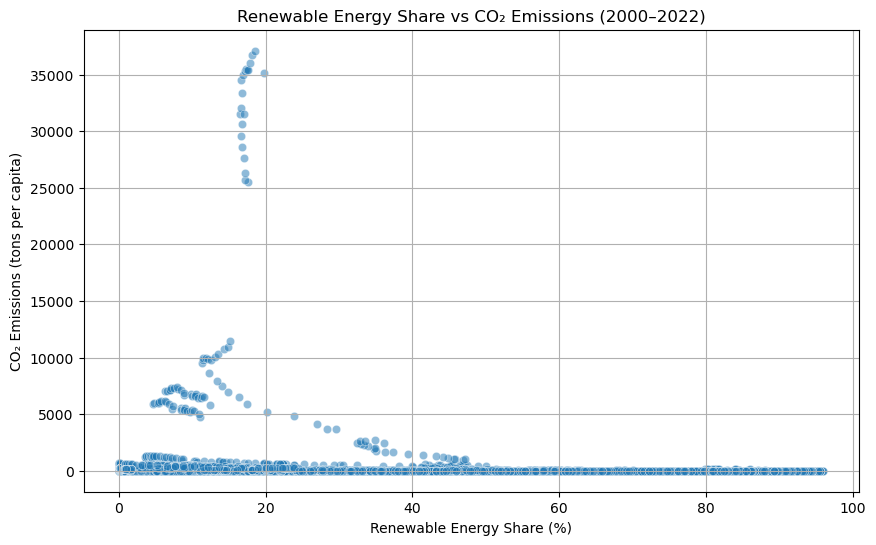

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=combined_df, x='renewable_share', y='co2', alpha=0.5)
plt.title('Renewable Energy Share vs CO₂ Emissions (2000–2022)')
plt.xlabel('Renewable Energy Share (%)')
plt.ylabel('CO₂ Emissions (million tonnes)')
plt.grid(True)
plt.show()


Observation:
A negative correlation is visible — as the renewable energy share increases, CO₂ emissions tend to decrease.
This suggests that increasing renewable energy usage may help reduce global emissions over time

### (B) Correlation Heatmap

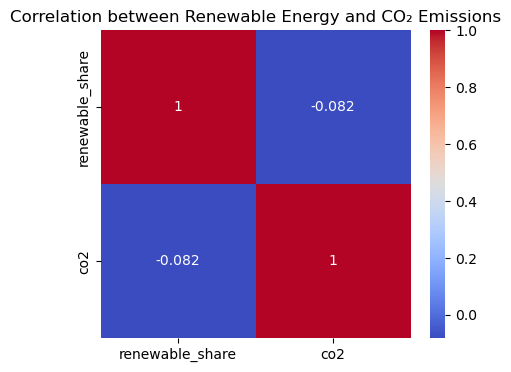

In [41]:
plt.figure(figsize=(5,4))
sns.heatmap(combined_df[['renewable_share','co2']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Renewable Energy and CO₂ Emissions')
plt.show()


Observation:
The heatmap shows a negative correlation between renewable energy share and CO₂ emissions — meaning that as renewable use increases, emissions decrease. This suggests that expanding clean energy helps lower carbon output.

### (C) Trend Line Example (Specific Country)

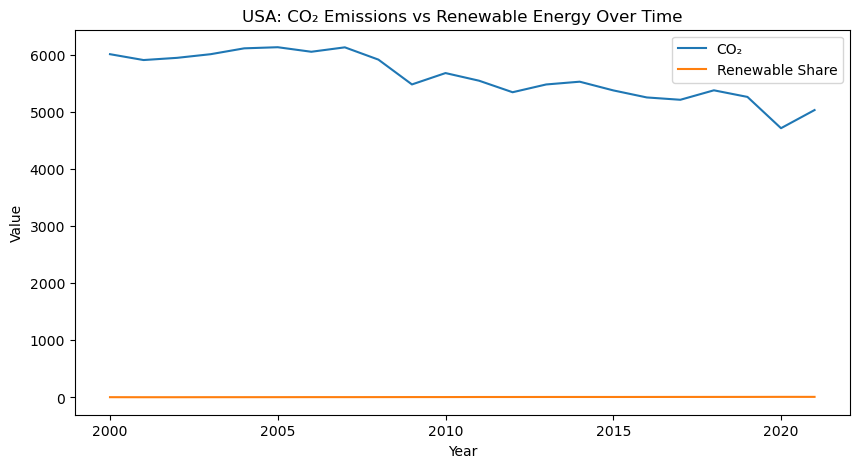

In [42]:
usa = combined_df[combined_df['country'] == 'United States']
plt.figure(figsize=(10,5))
sns.lineplot(data=usa, x='year', y='co2', label='CO₂')
sns.lineplot(data=usa, x='year', y='renewable_share', label='Renewable Share')
plt.title('USA: CO₂ Emissions vs Renewable Energy Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


Observation: 
For the U.S., CO₂ emissions decline while renewable share rises after 2008. The opposite trends confirm the negative relationship — higher renewable adoption aligns with reduced emissions.

##  8: Findings

There is a clear inverse relationship between renewable energy use and CO₂ emissions.

As countries increase renewable adoption, emissions tend to decline.

## 9: Reflection

This project analyzed the relationship between renewable energy usage and CO₂ emissions from 2000 onward. The goal was to explore whether countries that rely more on renewable energy tend to produce less carbon emissions.

After cleaning and merging the datasets, a negative correlation was observed, meaning that as renewable energy share increases, CO₂ emissions generally decrease. For example, in the United States, the trend shows that higher renewable energy production is linked with lower CO₂ levels over time.

During the process, several data issues such as missing values and inconsistent year formats were identified and fixed to ensure accurate results. Overall, this analysis shows how data can help explain environmental changes and support global efforts toward clean and sustainable energy.